# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

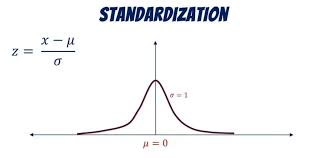


In [31]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# Upload and load dataset
print("Uploading dataset...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

try:
    df = pd.read_csv(filename, skiprows=4)
    print("Dataset loaded successfully")
except:
    df = pd.read_csv(filename)
    print("Dataset loaded successfully")

print(f"Dataset shape: {df.shape}")

# Data Preprocessing
print("\nDATA PREPROCESSING")

# Identify non-numeric data
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")
print(f"Missing values before handling: {df.isnull().sum().sum()}")

# Fill ALL missing values
df_clean = df.copy()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

print(f"After numeric imputation: {df_clean.isnull().sum().sum()} missing values")

# Apply encoding to non-numeric columns
print("\nAPPLYING ENCODING")
df_encoded = df_clean.copy()

for col in non_numeric_cols:
    unique_vals = df_encoded[col].nunique()

    if unique_vals == 1:
        df_encoded = df_encoded.drop(col, axis=1)
        print(f"Dropped '{col}': 1 category")

    elif 2 <= unique_vals <= 20:
        encoded = pd.get_dummies(df_encoded[col], prefix=col, prefix_sep='_')
        encoded = encoded.astype(int)
        df_encoded = df_encoded.drop(col, axis=1)
        df_encoded = pd.concat([df_encoded, encoded], axis=1)
        print(f"Encoded '{col}': {unique_vals} categories")

    else:
        top_categories = df_encoded[col].value_counts().nlargest(10).index
        df_encoded[col] = df_encoded[col].where(df_encoded[col].isin(top_categories), 'Other')
        encoded = pd.get_dummies(df_encoded[col], prefix=col, prefix_sep='_')
        encoded = encoded.astype(int)
        df_encoded = df_encoded.drop(col, axis=1)
        df_encoded = pd.concat([df_encoded, encoded], axis=1)
        print(f"Reduced & encoded '{col}': {unique_vals} categories")

# Final cleanup
df_encoded = df_encoded.fillna(0)
df_encoded = df_encoded.astype(float)
print(f"Final missing values: {df_encoded.isnull().sum().sum()}")

# Final PCA data selection
print("\nFINAL PCA DATA SELECTION")
pca_columns = list(df_encoded.columns)
pca_data = df_encoded[pca_columns].copy()

print(f"Initial PCA data: {pca_data.shape}")

# Remove constant columns
constant_columns = [col for col in pca_columns if pca_data[col].nunique() == 1]
if constant_columns:
    pca_columns = [col for col in pca_columns if col not in constant_columns]
    pca_data = pca_data[pca_columns]
    print(f"Removed {len(constant_columns)} constant columns")

print(f"Final PCA data: {pca_data.shape}")
print(f"Original features: {df.shape[1]} -> After preprocessing: {pca_data.shape[1]}")

# Verify encoded features
encoded_features = [col for col in pca_columns if any(nc in col for nc in non_numeric_cols)]
print(f"Encoded features included: {len(encoded_features)}")

if encoded_features:
    print(f"Sample: {encoded_features[:2]}")
else:
    print("No encoded features found")

# Data Standardization (numpy only)
print("\nDATA STANDARDIZATION")
data_array = pca_data.values
mean = np.mean(data_array, axis=0)
std = np.std(data_array, axis=0)
std[std == 0] = 1

standardized_data = (data_array - mean) / std

print(f"Standardization completed")
print(f"Data shape: {standardized_data.shape}")
print(f"Mean: {np.mean(standardized_data, axis=0)[0]:.2e}")
print(f"Std: {np.std(standardized_data, axis=0)[0]:.2f}")

# Display the first 5 rows of standardized data as required
print(f"\nFirst 5 rows of standardized data:")
print(standardized_data[:5])

Uploading dataset...


Saving API_SSF_DS2_en_csv_v2_14635.csv to API_SSF_DS2_en_csv_v2_14635 (18).csv
Dataset loaded successfully
Dataset shape: (1516, 70)

DATA PREPROCESSING
Non-numeric columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
Missing values before handling: 67609
After numeric imputation: 1516 missing values

APPLYING ENCODING
Dropped 'Country Name': 1 category
Dropped 'Country Code': 1 category
Reduced & encoded 'Indicator Name': 1516 categories
Reduced & encoded 'Indicator Code': 1516 categories
Final missing values: 0

FINAL PCA DATA SELECTION
Initial PCA data: (1516, 88)
Removed 1 constant columns
Final PCA data: (1516, 87)
Original features: 70 -> After preprocessing: 87
Encoded features included: 22
Sample: ['Indicator Name_Arable land (% of land area)', 'Indicator Name_Commercial service exports (current US$)']

DATA STANDARDIZATION
Standardization completed
Data shape: (1516, 87)
Mean: 7.50e-17
Std: 1.00

First 5 rows of standardized data:
[[ 7.07150042e-17  6.

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [32]:
# Step 3: Calculate the Covariance Matrix
# Calculate covariance matrix using formula: (1/(n-1)) * X^T * X
n = standardized_data.shape[0]
cov_matrix = (1 / (n - 1)) * np.dot(standardized_data.T, standardized_data)

print("Covariance matrix shape:", cov_matrix.shape)
cov_matrix

Covariance matrix shape: (87, 87)


array([[ 1.00066007e+00,  9.99637630e-01,  9.99533101e-01, ...,
         1.02594867e-18,  1.02594867e-18,  1.02594867e-18],
       [ 9.99637630e-01,  1.00066007e+00,  1.00052072e+00, ...,
         1.17251277e-18,  1.17251277e-18,  1.17251277e-18],
       [ 9.99533101e-01,  1.00052072e+00,  1.00066007e+00, ...,
         1.46564096e-18,  1.46564096e-18,  1.46564096e-18],
       ...,
       [ 1.02594867e-18,  1.17251277e-18,  1.46564096e-18, ...,
         1.00066007e+00, -6.60501694e-04, -6.60501694e-04],
       [ 1.02594867e-18,  1.17251277e-18,  1.46564096e-18, ...,
        -6.60501694e-04,  1.00066007e+00, -6.60501694e-04],
       [ 1.02594867e-18,  1.17251277e-18,  1.46564096e-18, ...,
        -6.60501694e-04, -6.60501694e-04,  1.00066007e+00]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [33]:
# Step 4: Perform Eigendecomposition
# Perform eigendecomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)
print("\nFirst 10 eigenvalues:")
print(eigenvalues[:10])
print("\nFirst eigenvector (first 10 elements):")
print(eigenvectors[0, :10])

Eigenvalues shape: (87,)
Eigenvectors shape: (87, 87)

First 10 eigenvalues:
[40.22859183+0.j 18.82097991+0.j  3.99496776+0.j  3.68949416+0.j
  2.01301855+0.j  2.00172863+0.j  2.00312466+0.j  2.00284421+0.j
  2.00267241+0.j  2.00270452+0.j]

First eigenvector (first 10 elements):
[-8.37809519e-02+0.j -1.81383087e-01+0.j -1.33371887e-02+0.j
 -1.30789812e-01+0.j -1.00043435e-02+0.j -1.29521234e-04+0.j
 -1.28690880e-03+0.j -3.17179526e-03+0.j  1.00834694e-03+0.j
  2.07172211e-03+0.j]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [35]:
# Step 5: Sort Principal Components
# Sort eigenvalues in descending order and sort eigenvectors accordingly
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted eigenvalues (first 10):")
print(sorted_eigenvalues[:10])
print("Sorted eigenvectors shape:", sorted_eigenvectors.shape)

print("\nFirst 5 sorted eigenvectors (first 5 elements each):")
for i in range(min(5, sorted_eigenvectors.shape[1])):
    print(f"Eigenvector {i+1}: {sorted_eigenvectors[:5, i]}")

Sorted eigenvalues (first 10):
[40.22859183+0.j 18.82097991+0.j  3.99496776+0.j  3.68949416+0.j
  2.01301855+0.j  2.00312466+0.j  2.00284421+0.j  2.00274888+0.j
  2.00272668+0.j  2.00270452+0.j]
Sorted eigenvectors shape: (87, 87)

First 5 sorted eigenvectors (first 5 elements each):
Eigenvector 1: [-0.08378095+0.j -0.08401551+0.j -0.08408617+0.j -0.08434483+0.j
 -0.08581296+0.j]
Eigenvector 2: [-0.18138309+0.j -0.18154966+0.j -0.18157641+0.j -0.18161224+0.j
 -0.18189911+0.j]
Eigenvector 3: [-0.01333719+0.j -0.01260152+0.j -0.01254394+0.j -0.012714  +0.j
 -0.01244934+0.j]
Eigenvector 4: [-0.13078981+0.j -0.13015164+0.j -0.12982866+0.j -0.12869806+0.j
 -0.12368078+0.j]
Eigenvector 5: [-0.01000434+0.j -0.00890034+0.j -0.00907424+0.j -0.00809453+0.j
 -0.00623794+0.j]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [37]:
# Step 6: Project Data onto Principal Components
# Calculate explained variance to decide on number of components

# Convert eigenvalues to real numbers
sorted_eigenvalues_real = sorted_eigenvalues.real
total_variance = np.sum(sorted_eigenvalues_real)
explained_variance = (sorted_eigenvalues_real / total_variance) * 100
cumulative_variance = np.cumsum(explained_variance)

# Dynamically select number of components to explain 95% variance
variance_threshold = 95.0
num_components = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f"Total variance: {total_variance:.2f}")
print(f"Number of components needed to explain {variance_threshold}% variance: {num_components}")
print(f"Cumulative variance with {num_components} components: {cumulative_variance[num_components-1]:.2f}%")

print(f"Variance breakdown:")
for i in range(min(5, len(explained_variance))):
    print(f"  PC{i+1}: {explained_variance[i]:.2f}%")

# Project data onto the principal components
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components].real)

print(f"Reduced data shape: {reduced_data.shape}")
print("First 5 rows of reduced data:")
print(reduced_data[:5])

Total variance: 87.06
Number of components needed to explain 95.0% variance: 12
Cumulative variance with 12 components: 95.07%
Variance breakdown:
  PC1: 46.21%
  PC2: 21.62%
  PC3: 4.59%
  PC4: 4.24%
  PC5: 2.31%
Reduced data shape: (1516, 12)
First 5 rows of reduced data:
[[ 5.86591808e-01 -3.40950305e-01 -2.43205421e+01  2.92420597e+00
  -1.34744664e+01  2.97399404e+01  4.52113499e+00  2.18499048e+01
  -2.79173093e+01  7.08382290e+00  1.12523348e+01 -2.19647553e-08]
 [ 3.12759761e-01 -1.71004700e-01 -2.43299613e+01  2.94197749e+00
  -8.89925602e+00  2.00438390e+01  2.02972064e+01 -9.97121637e+00
   3.90952872e+01 -3.86424772e+00  2.26316667e+00  1.15675556e-08]
 [ 3.56838080e-02  1.87013930e-02 -2.43395249e+01  2.83022137e+00
  -6.42921437e+00 -1.35558675e+00 -2.19495132e+01 -2.95428682e+01
  -9.38970772e+00  1.39052528e+01 -2.44464042e+01 -1.10490123e-08]
 [ 2.11806620e+00 -3.03447400e-01 -2.45155967e+01  9.89568624e-01
  -1.95653423e+00 -7.83348454e+00  2.94372297e+01 -8.83778802e

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [39]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')
print(f"Original data shape: {standardized_data.shape}")
print(f"Dimensionality reduction: {standardized_data.shape[1]} → {num_components} features")
print(f"Variance retained: {cumulative_variance[num_components-1]:.2f}%")

print("\nFirst 5 rows of reduced data:")
print(reduced_data[:5])

Reduced Data Shape: (1516, 12)
Original data shape: (1516, 87)
Dimensionality reduction: 87 → 12 features
Variance retained: 95.07%

First 5 rows of reduced data:
[[ 5.86591808e-01 -3.40950305e-01 -2.43205421e+01  2.92420597e+00
  -1.34744664e+01  2.97399404e+01  4.52113499e+00  2.18499048e+01
  -2.79173093e+01  7.08382290e+00  1.12523348e+01 -2.19647553e-08]
 [ 3.12759761e-01 -1.71004700e-01 -2.43299613e+01  2.94197749e+00
  -8.89925602e+00  2.00438390e+01  2.02972064e+01 -9.97121637e+00
   3.90952872e+01 -3.86424772e+00  2.26316667e+00  1.15675556e-08]
 [ 3.56838080e-02  1.87013930e-02 -2.43395249e+01  2.83022137e+00
  -6.42921437e+00 -1.35558675e+00 -2.19495132e+01 -2.95428682e+01
  -9.38970772e+00  1.39052528e+01 -2.44464042e+01 -1.10490123e-08]
 [ 2.11806620e+00 -3.03447400e-01 -2.45155967e+01  9.89568624e-01
  -1.95653423e+00 -7.83348454e+00  2.94372297e+01 -8.83778802e+00
  -8.67313111e+00  2.87494287e+01 -6.93173248e+00 -3.20247636e-08]
 [ 7.77157854e-01 -9.53668889e-02 -2.4441

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

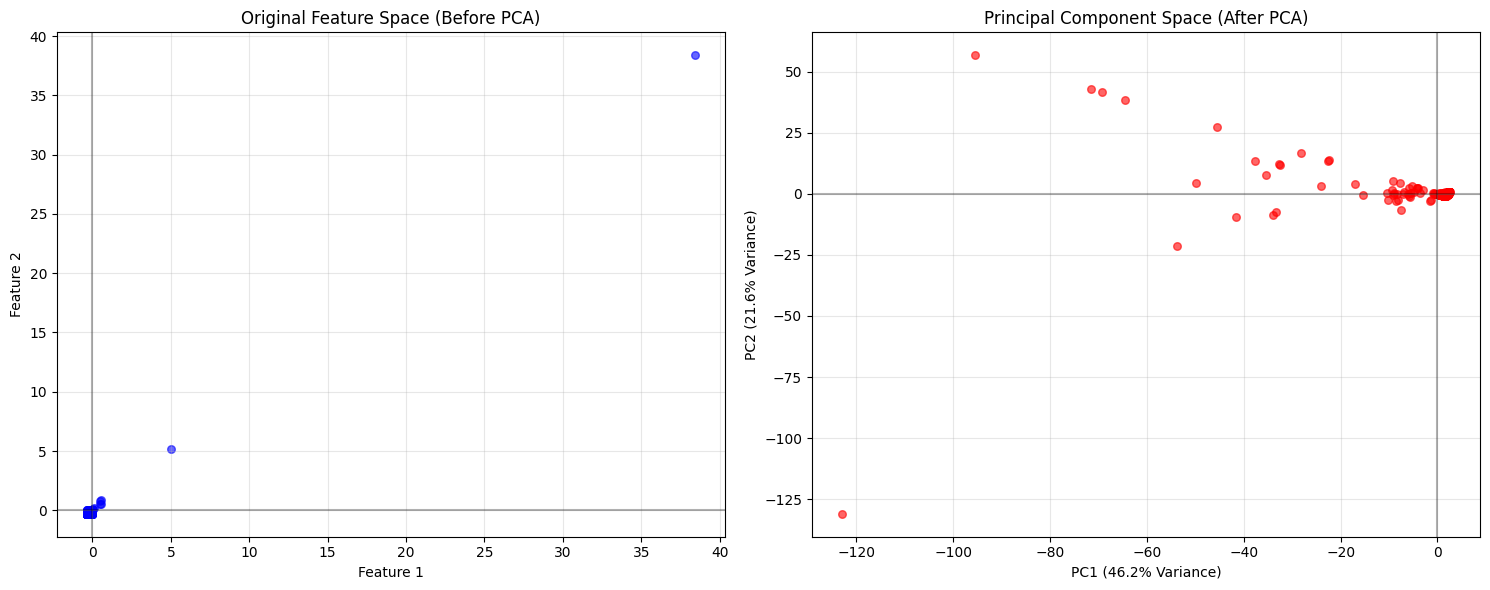

PCA VISUALIZATION ANALYSIS
BEFORE PCA (Left Plot):
- Original features in natural coordinate system
- Shows relationships between first two features

AFTER PCA (Right Plot):
- Data transformed to principal components
- PC1 captures 46.2% variance
- PC2 captures 21.6% variance
- Coordinate system aligned with maximum variance

SUMMARY:
- Dimensionality reduction: 87 → 12 features
- Variance retained: 95.07%
- Data points preserved: 1516
- PC1 variance > PC2 variance: Correct PCA scaling


In [42]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

# Create figure with two subplots
plt.figure(figsize=(15, 6))

# Plot 1: Original feature space (first two features)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.6, s=30, c='blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Feature Space (Before PCA)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot 2: PCA space (first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, s=30, c='red')
plt.xlabel(f'PC1 ({explained_variance[0]:.1f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.1f}% Variance)')
plt.title('Principal Component Space (After PCA)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Clear explanation
print("PCA VISUALIZATION ANALYSIS")
print("=" * 40)
print("BEFORE PCA (Left Plot):")
print("- Original features in natural coordinate system")
print("- Shows relationships between first two features")

print("\nAFTER PCA (Right Plot):")
print(f"- Data transformed to principal components")
print(f"- PC1 captures {explained_variance[0]:.1f}% variance")
print(f"- PC2 captures {explained_variance[1]:.1f}% variance")
print("- Coordinate system aligned with maximum variance")

print(f"\nSUMMARY:")
print(f"- Dimensionality reduction: {standardized_data.shape[1]} → {num_components} features")
print(f"- Variance retained: {cumulative_variance[num_components-1]:.2f}%")
print(f"- Data points preserved: {reduced_data.shape[0]}")
print(f"- PC1 variance > PC2 variance: Correct PCA scaling")